# Chapter 3: Exercise 13

**Import packages**

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize, poly)

### (a) Generate a vector x containing n=100 observations from N(0, 1) distribution

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)

### (b) Generate a vector eps containing n=100 observations from N(0, 0.25) (mean=0, variance=0.25)

In [3]:
eps = rng.normal(loc=0, scale=np.sqrt(0.25), size=100)

### (c) Using x and eps generate a vector y according to $Y = -1 + 0.5X + \epsilon$

In [4]:
y = -1 + 0.5 * x + eps

In [5]:
len(y)

100

- **length(y)** = 100
- **$\beta_0$** = -1
- **$\beta_1$** = 0.5

### (d) Scatter plot between x and y

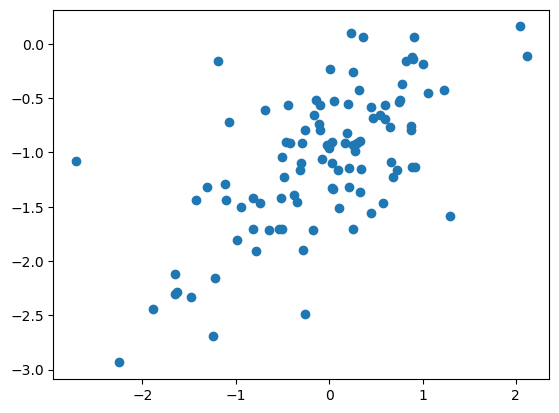

In [6]:
plt.scatter(x, y)

There appears to be a positive linear relationship between x and y.

### (e) Least squares linear model to predict y using x

In [7]:
dfx = pd.DataFrame({'intercept': np.ones(len(x)), 'x': x})

In [8]:
model = sm.OLS(y, dfx)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
x,0.4843,0.059,8.233,0.0


Our model performs surprisingly well. $-1.0380 = \hat{\beta_0} \approx \beta_0 = -1$ and $0.4843 = \hat{\beta_1} \approx \beta_1 = 0.5$

### (f) Plot of least squares line, population regression line, and scatterplot

In [10]:
beta0 = results.params[0]

In [11]:
beta1 = results.params[1]

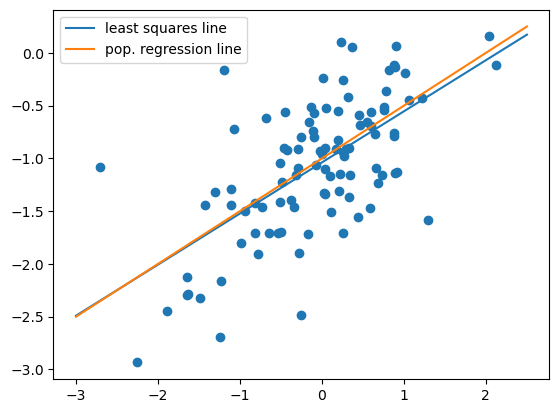

In [12]:
plt.scatter(x, y)
plt.plot([-3,2.5],[beta0 -3*beta1, beta0 + 2.5*beta1], label='least squares line')
plt.plot([-3,2.5],[-1 -3*0.5, -1 + 2.5*0.5], label='pop. regression line')
plt.legend()

### (g) Polynomial regression model that predicts $y$ using $x$ and $x^2$

In [15]:
df = pd.DataFrame({'x': x, 'y': y})

In [20]:
X = MS([poly('x', degree=2)]).fit_transform(df)

In [21]:
model2 = sm.OLS(y, X)
results2 = model2.fit()

In [22]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,-1.0737,0.050,-21.326,0.000
"poly(x, degree=2)[0]",4.1240,0.503,8.191,0.000
"poly(x, degree=2)[1]",-0.0261,0.503,-0.052,0.959


In [24]:
anova_lm(results, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,24.586567,0.0,NaN,NaN,NaN
1,97.0,24.585886,1.0,0.000681,0.002688,0.958757


There is no evidence the quadratic term improves the model fit. This is seen by the high p-value associated with the t-statistic as well as the high p-value associated with the F-statistic.